In [3]:
import pandas as pd

# File paths
file_paths = [
    r"D:\Project\Flipkart SA\motorola_text_cleaned.csv",
    r"D:\Project\Flipkart SA\oneplus_text_cleaned.csv",
    r"D:\Project\Flipkart SA\honor_text_cleaned.csv",
    r"D:\Project\Flipkart SA\google_text_cleaned.csv",
    r"D:\Project\Flipkart SA\oppo_text_cleaned.csv"
]

# Read and concatenate the CSV files
dfs = [pd.read_csv(file) for file in file_paths]
concatenated_df = pd.concat(dfs, ignore_index=True)

# Drop the specified columns
columns_to_drop = ['Product_Link', 'Product_Price']
concatenated_df = concatenated_df.drop(columns=columns_to_drop)

# Rename the specified columns
columns_to_rename = {'Reviews': 'Review', 'Ratings': 'Rating'}
concatenated_df = concatenated_df.rename(columns=columns_to_rename)

# Save the modified DataFrame to a new CSV file

output_file_path = r"D:\Project\Flipkart SA\all_products_reviews_merged.csv"
concatenated_df.to_csv(output_file_path, index=False)

print(f"Concatenated and modified file saved to {output_file_path}")

Concatenated and modified file saved to D:\Project\Flipkart SA\all_products_reviews_merged.csv


In [1]:
import pandas as pd
df = pd.read_csv("D:\\Project\\Flipkart SA\\all_products_reviews_merged.csv")

In [3]:
df.shape

(13145, 3)

In [5]:
df.isnull().sum()

Review          15
Rating           0
Product_Name     0
dtype: int64

In [7]:
df = df.dropna()

In [9]:
df.duplicated().sum()

1286

In [11]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11844 entries, 0 to 13144
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        11844 non-null  object
 1   Rating        11844 non-null  int64 
 2   Product_Name  11844 non-null  object
dtypes: int64(1), object(2)
memory usage: 370.1+ KB


In [25]:
df['Sentiment'].value_counts()

Sentiment
Positive    10778
Neutral       575
Negative      491
Name: count, dtype: int64

In [15]:
df['Product_ID'] = pd.factorize(df['Product_Name'])[0] + 1

In [19]:
df.head()

Review  Rating  \
0  crisp display camera performed way better expe...       4   
1  one day review  awesome design awesome camera ...       4   
2              camera best mobile phone heating much       4   
3  could recommend best price range clean user in...       5   
4  phone come random access memory boost get turn...       5   

                            Product_Name  Product_ID  
0  MOTOROLA Edge 50 (Koala Grey, 256 GB)           1  
1  MOTOROLA Edge 50 (Koala Grey, 256 GB)           1  
2  MOTOROLA Edge 50 (Koala Grey, 256 GB)           1  
3  MOTOROLA Edge 50 (Koala Grey, 256 GB)           1  
4  MOTOROLA Edge 50 (Koala Grey, 256 GB)           1

In [17]:
df.columns

Index(['Review', 'Rating', 'Product_Name', 'Product_ID'], dtype='object')

In [ ]:
#df.drop(columns=['Product_Name'], inplace=True)

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thara\AppData\Roaming\nltk_data...


True

In [21]:
blank=[]
for i,j,k,l,m in df.itertuples():
  if type(j)==str:
    if j.isspace():
      blank.append(i)

In [15]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Step 1: Download VADER lexicon (only needed once)
#nltk.download('vader_lexicon')


# Step 2: Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 3: Define a function to get sentiment scores
def get_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']  # Returning the compound score

# Step 4: Apply the function to the Review column
df['Sentiment_Score'] = df['Review'].apply(get_sentiment)

# Step 5: Classify sentiment as Positive, Negative, or Neutral
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
)

In [17]:
# Save the resulting DataFrame to a CSV file
output_path = r"D:/Project/Flipkart SA/product_sentiment.csv"
df.to_csv(output_path, index=False)

In [21]:
# Step 6: Aggregate average sentiment scores by Product_Name
product_recommendations = df.groupby('Product_Name').agg({
    'Product_ID': 'first',
    'Sentiment': 'first',
    'Sentiment_Score': 'mean',
    'Rating': 'mean',  # Average Rating if you want to include it
    'Review': 'count'   # Count of reviews for each product
}).reset_index()

# Step 7: Sort the products by average sentiment score
product_recommendations = product_recommendations.sort_values(by='Sentiment_Score', ascending=False)

# Save the resulting DataFrame to a CSV file
output_path = r"D:/Project/Flipkart SA/product_recommendations.csv"
product_recommendations.to_csv(output_path, index=False)

print(f"Product recommendations saved to {output_path}")

Product recommendations saved to D:/Project/Flipkart SA/product_recommendations.csv


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("D:/Project/Flipkart SA/product_recommendations.csv")

In [5]:
df1 = pd.read_csv("D:\\Project\\Flipkart SA\\all_products_reviews_merged.csv")

In [25]:
df.columns

Index(['Product_Name', 'Product_ID', 'Sentiment', 'Sentiment_Score', 'Rating',
       'Review'],
      dtype='object')

In [27]:
df1.columns

Index(['Review', 'Rating', 'Product_Name'], dtype='object')

In [7]:
merged_df = pd.merge(df, df1, on='Product_Name', how='inner')

In [9]:
# Save the resulting DataFrame to a CSV file
output_path = r"D:/Project/Flipkart SA/all_product_recommendations.csv"
merged_df.to_csv(output_path, index=False)

In [11]:
df2 = pd.read_csv("D:/Project/Flipkart SA/all_product_recommendations.csv")

In [15]:
df2.head()

Product_Name  Product_ID Sentiment  Sentiment_Score  \
0  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
1  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
2  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
3  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
4  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   

   Rating_x  Review_x                                           Review_y  \
0       4.6        10  got phone two week order date thanks flipkarts...   
1       4.6        10  huawei always reputation getting bang come pri...   
2       4.6        10  writing review spending hour honor first hat f...   
3       4.6        10  review written within one day phone mobile goo...   
4       4.6        10  best performance phone still using performance...   

   Rating_y  
0         4  
1         5  
2         5  
3         4  
4         5

In [17]:
df2.rename(columns={
    'Rating_x': 'Average_Ratings',
    'Review_x': 'Review_counts',
    'Review_y': 'Review',
    'Rating_y': 'Rating'
    # Add more as needed
}, inplace=True)


In [19]:
df2.head()

Product_Name  Product_ID Sentiment  Sentiment_Score  \
0  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
1  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
2  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
3  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   
4  Honor 7 (Mystery Grey, 16 GB)         112  Positive          0.98724   

   Average_Ratings  Review_counts  \
0              4.6             10   
1              4.6             10   
2              4.6             10   
3              4.6             10   
4              4.6             10   

                                              Review  Rating  
0  got phone two week order date thanks flipkarts...       4  
1  huawei always reputation getting bang come pri...       5  
2  writing review spending hour honor first hat f...       5  
3  review written within one day phone mobile goo...       4  
4  best performance phone still using performance...       5

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')

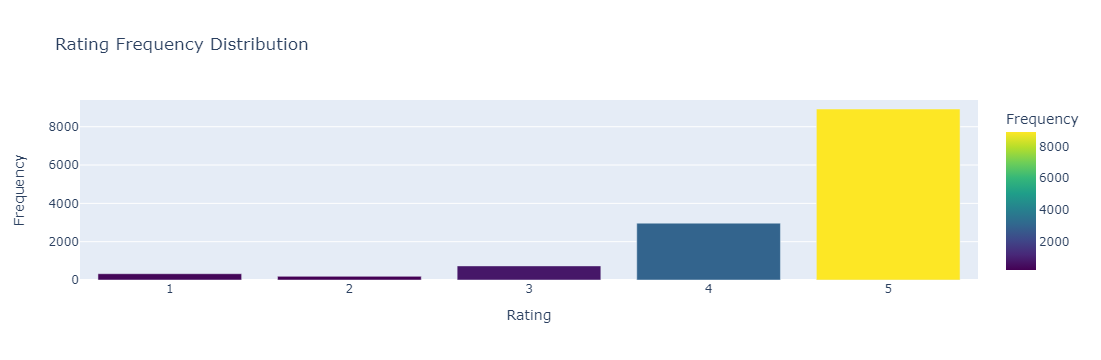

In [9]:
# Assuming df1 is your dataframe

# Get unique values from the 'Rating' column and sort them
unique_ratings = sorted(df1['Rating'].unique())

# Calculate the count of each unique rating
rating_counts = df1['Rating'].value_counts().reindex(unique_ratings).fillna(0)

# Create a DataFrame for Plotly
rating_df = pd.DataFrame({
    'Rating': unique_ratings,
    'Frequency': rating_counts.values
})

# Create the Plotly bar chart
fig = px.bar(rating_df, x='Rating', y='Frequency', title='Rating Frequency Distribution', 
             labels={'Rating': 'Rating', 'Frequency': 'Frequency'}, 
             color='Frequency', color_continuous_scale='Viridis')

# Show the interactive plot
fig.show()


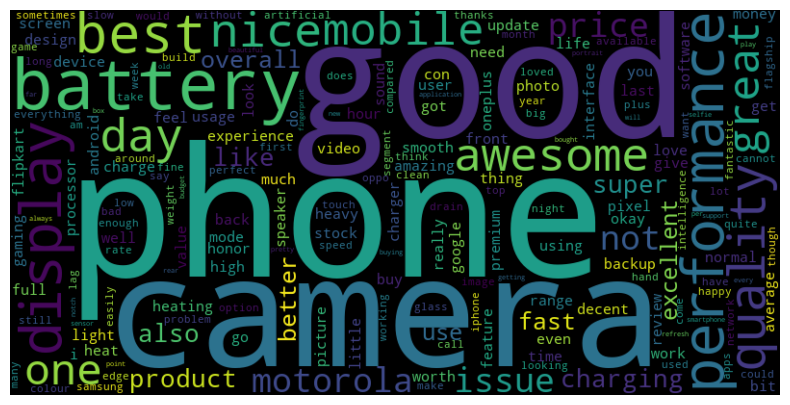

In [27]:
from wordcloud import WordCloud
from collections import Counter

# Concatenate all the reviews into a single string
all_reviews = ' '.join(df1['Review'].astype(str))

# Split the cleaned reviews into words
words = all_reviews.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='black', 
                      max_words=200).generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()


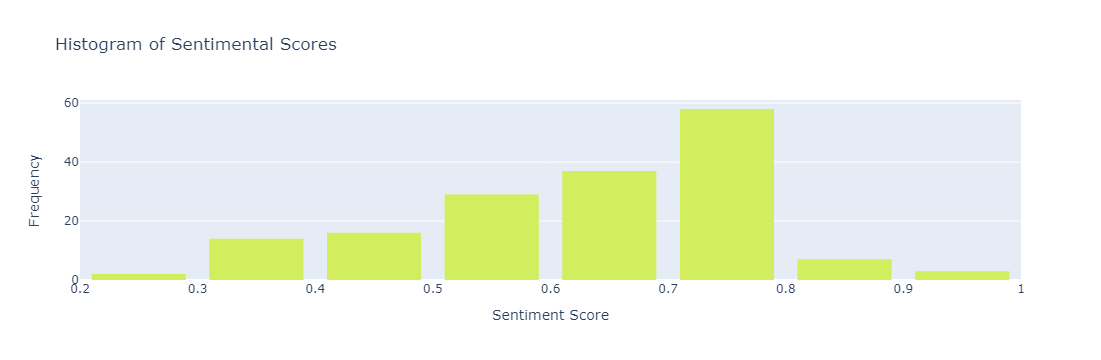

In [13]:
# Create a histogram of Sentimental Scores
fig_hist = px.histogram(df, x='Sentiment_Score', nbins=10, title='Histogram of Sentimental Scores',
                         labels={'Sentiment_Score': 'Sentiment Score'},
                         color_discrete_sequence=['#d2ee5e'])

# Update layout for better appearance
fig_hist.update_layout(
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency',
    bargap=0.2,
    hovermode="x unified"  # Show hover info for all bars
)

# Show the histogram
fig_hist.show()

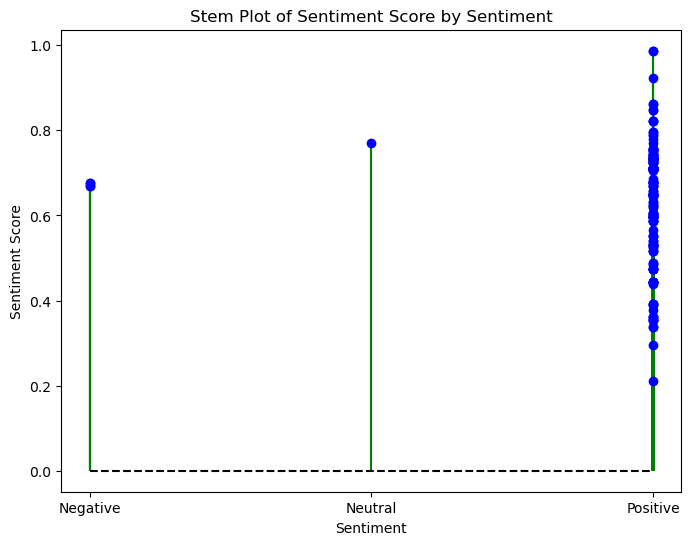

In [17]:
# Create the figure
plt.figure(figsize=(8, 6))

# Define sentiment categories and their corresponding numeric values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Create the stem plot using the mapped values directly in the function
plt.stem(df['Sentiment'].map(sentiment_mapping), df['Sentiment_Score'], linefmt='-g', markerfmt='ob', basefmt="--k")

# Customize plot
plt.title('Stem Plot of Sentiment Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')

# Set the x-ticks back to sentiment labels
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])

# Show the plot
plt.show()

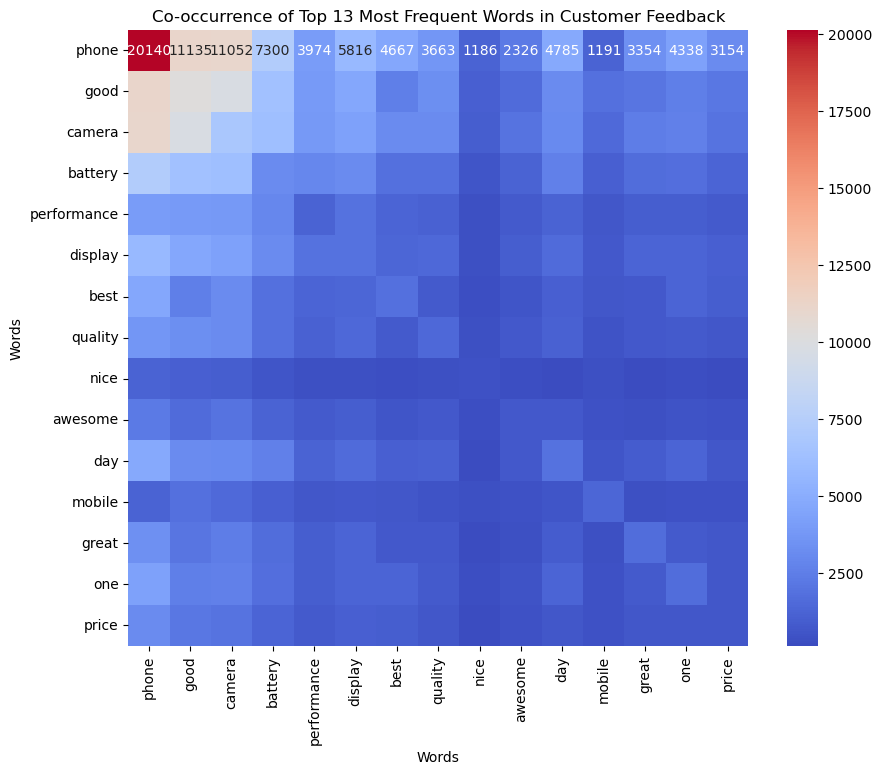

In [31]:
import numpy as np


# Ensure all reviews are strings, handling NaN values
df1['Review'] = df1['Review'].astype(str)

# Combine all cleaned reviews into one string
all_reviews = ' '.join(df1['Review'])

# Get the top 13 most frequent words
word_counts = Counter(all_reviews.split())
common_words = [word for word, _ in word_counts.most_common(15)]

# Initialize the co-occurrence matrix
co_occurrence_matrix = np.zeros((15, 15))

# Create a dictionary to map words to indices
word_to_index = {word: i for i, word in enumerate(common_words)}

# Fill the co-occurrence matrix
for review in df1['Review']:
    words = review.split()
    for i, word in enumerate(words):
        if word in common_words:
            for j in range(i + 1, len(words)):
                if words[j] in common_words:
                    word_i, word_j = word_to_index[word], word_to_index[words[j]]
                    co_occurrence_matrix[word_i][word_j] += 1
                    co_occurrence_matrix[word_j][word_i] += 1  # Since it's symmetric

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, xticklabels=common_words, yticklabels=common_words, cmap='coolwarm', annot=True, fmt='g')
plt.title('Co-occurrence of Top 13 Most Frequent Words in Customer Feedback')
plt.xlabel('Words')
plt.ylabel('Words')
plt.show()

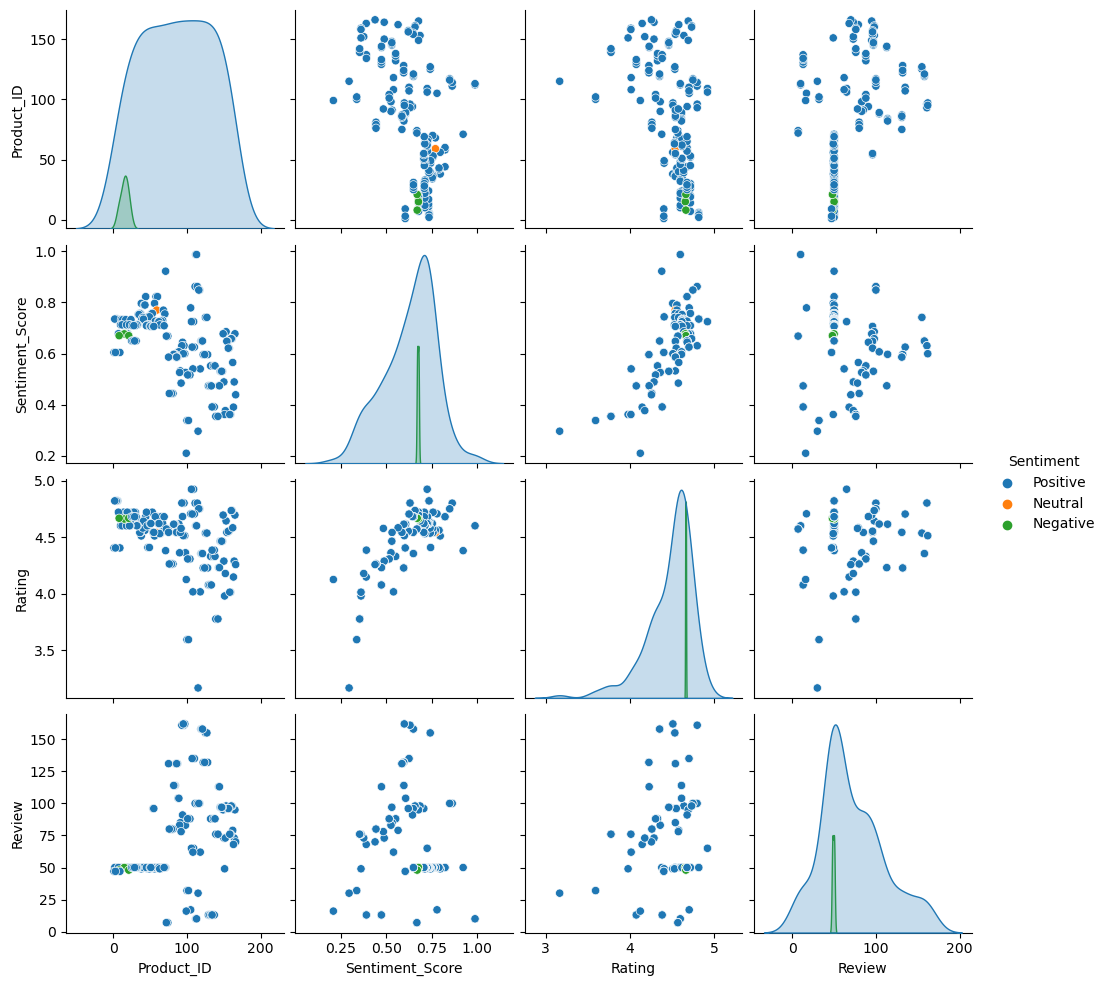

In [15]:
sns.pairplot(df, hue='Sentiment')
plt.show()

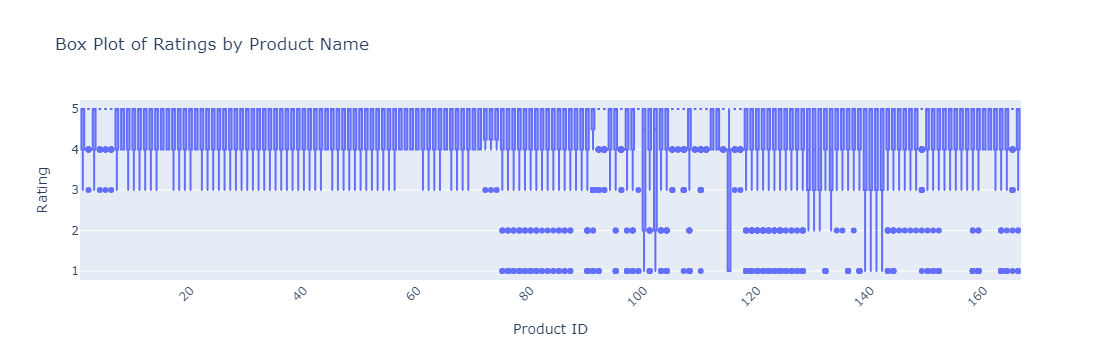

In [39]:
import plotly.express as px

fig = px.box( x=df2['Product_ID'], y=df2['Rating'], title='Box Plot of Ratings by Product Name')
fig.update_xaxes(title='Product ID', tickangle=-45)
fig.update_yaxes(title='Rating')
fig.show()

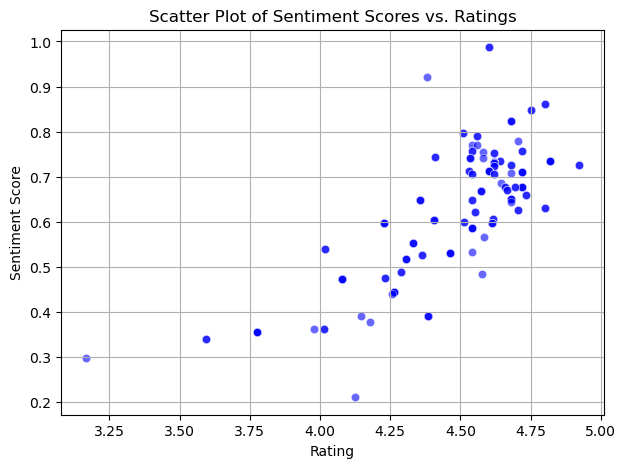

In [61]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Rating', y='Sentiment_Score', alpha=0.6, color='blue')
plt.title('Scatter Plot of Sentiment Scores vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

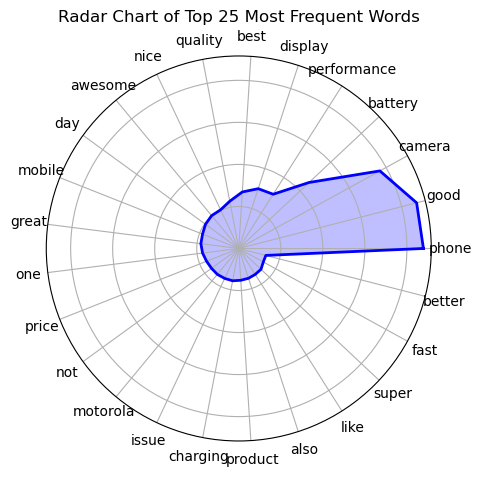

In [65]:


# Combine all cleaned reviews into one string
all_reviews = ' '.join(df1['Review'].astype(str))

# Get the top 10 most frequent words
word_counts = Counter(all_reviews.split())
common_words = [word for word, _ in word_counts.most_common(25)]
frequencies = [word_counts[word] for word in common_words]

# Function to create radar chart
def create_radar_chart(categories, values):
    num_vars = len(categories)

    # Compute angle for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
    values = values + values[:1]
    angles += angles[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Labels for each category
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.title('Radar Chart of Top 25 Most Frequent Words')
    plt.show()

# Call the function to create the radar chart
create_radar_chart(common_words, frequencies)

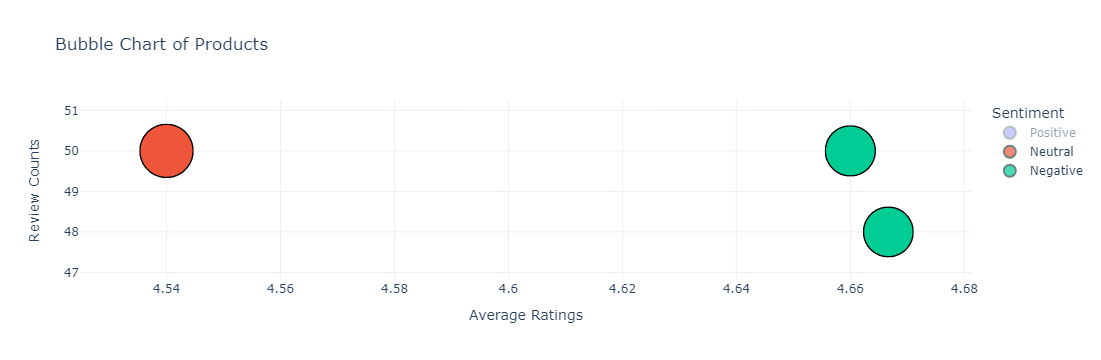

In [85]:
# Create bubble chart using Plotly
fig = px.scatter(df2, 
                 x='Average_Ratings', 
                 y='Review_counts', 
                 size='Sentiment_Score',  # Bubble size
                 color='Sentiment',  # Color by sentiment
                 hover_name='Product_Name',  # Product name on hover
                 size_max=60,  # Maximum bubble size
                 title='Bubble Chart of Products',
                 labels={'Average_Ratings': 'Average Ratings', 'Review_counts': 'Review Counts'},
                 template='plotly_white')

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()